# DecisionTree - Ineuron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].nunique()

6

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df['quality'].value_counts(normalize=True)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

In [9]:
df.duplicated().sum()

240

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1359, 12)

<AxesSubplot:>

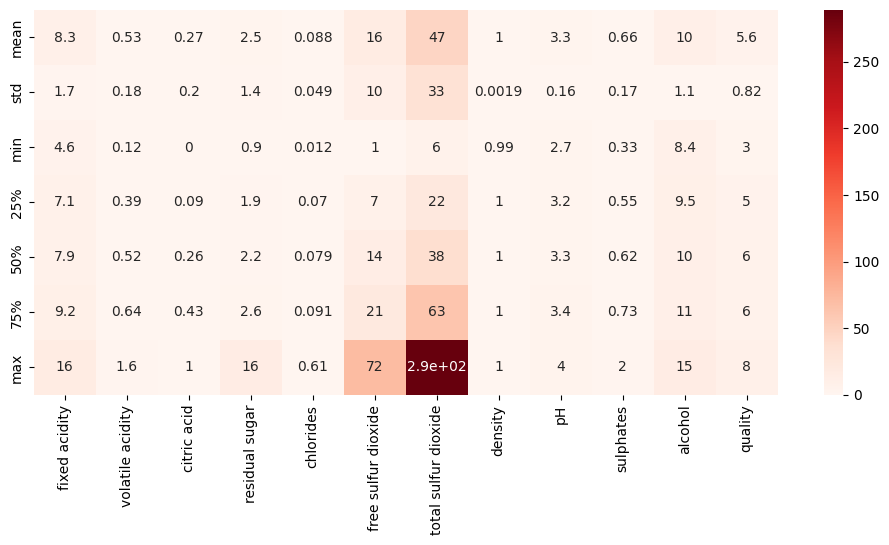

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(df.describe().iloc[1:,:],cmap='Reds', annot=True)

<AxesSubplot:>

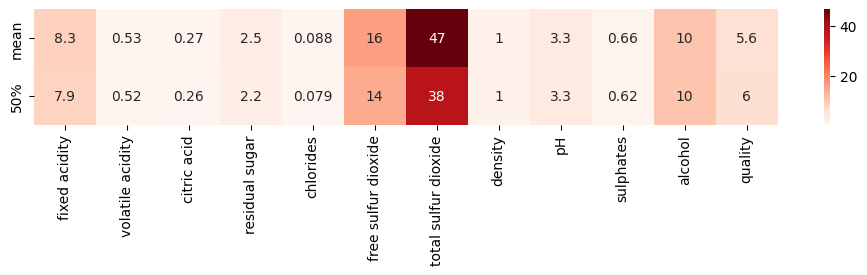

In [13]:
plt.figure(figsize=(12,1.5))
sns.heatmap(df.describe().iloc[[1,5],:],cmap='Reds', annot=True)

In [14]:
target  = 'quality'
data = df.copy()
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

<IPython.core.display.Javascript object>

X_train shape: (951, 11)
X_test shape: (408, 11)
y_train shape: (951,)
y_test shape: (408,)


In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, y_pred)

0.4950980392156863

In [20]:
model.score(X_train, y_train)

1.0

In [21]:
# grid_param ={
#     'criterion':['gini','entropy'],
#     'max_depth': range(2,32),
#     'min_samples_leaf': range(1,10,1),
#     'min_samples_split':range(2,10,1),
#     'splitter': ['best', 'random']
# }

In [22]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=model, 
#                            param_grid=grid_param,
#                            cv=5, n_jobs=-1)

In [23]:
# grid_search.fit(X_train, y_train)

In [24]:
# grid_search.best_estimator_

In [25]:
# best_params = grid_search.best_params_
# best_params

In [26]:
# dt_best = DecisionTreeClassifier(
#     criterion=best_params['criterion'],
#     max_depth=best_params['max_depth'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     min_samples_split=best_params['min_samples_split'],
#     splitter=best_params['splitter'])

In [27]:
# dt_best.fit(X_train, y_train)

In [28]:
# y_pred = dt_best.predict(X_test)

In [29]:
# accuracy_score(y_test, y_pred)

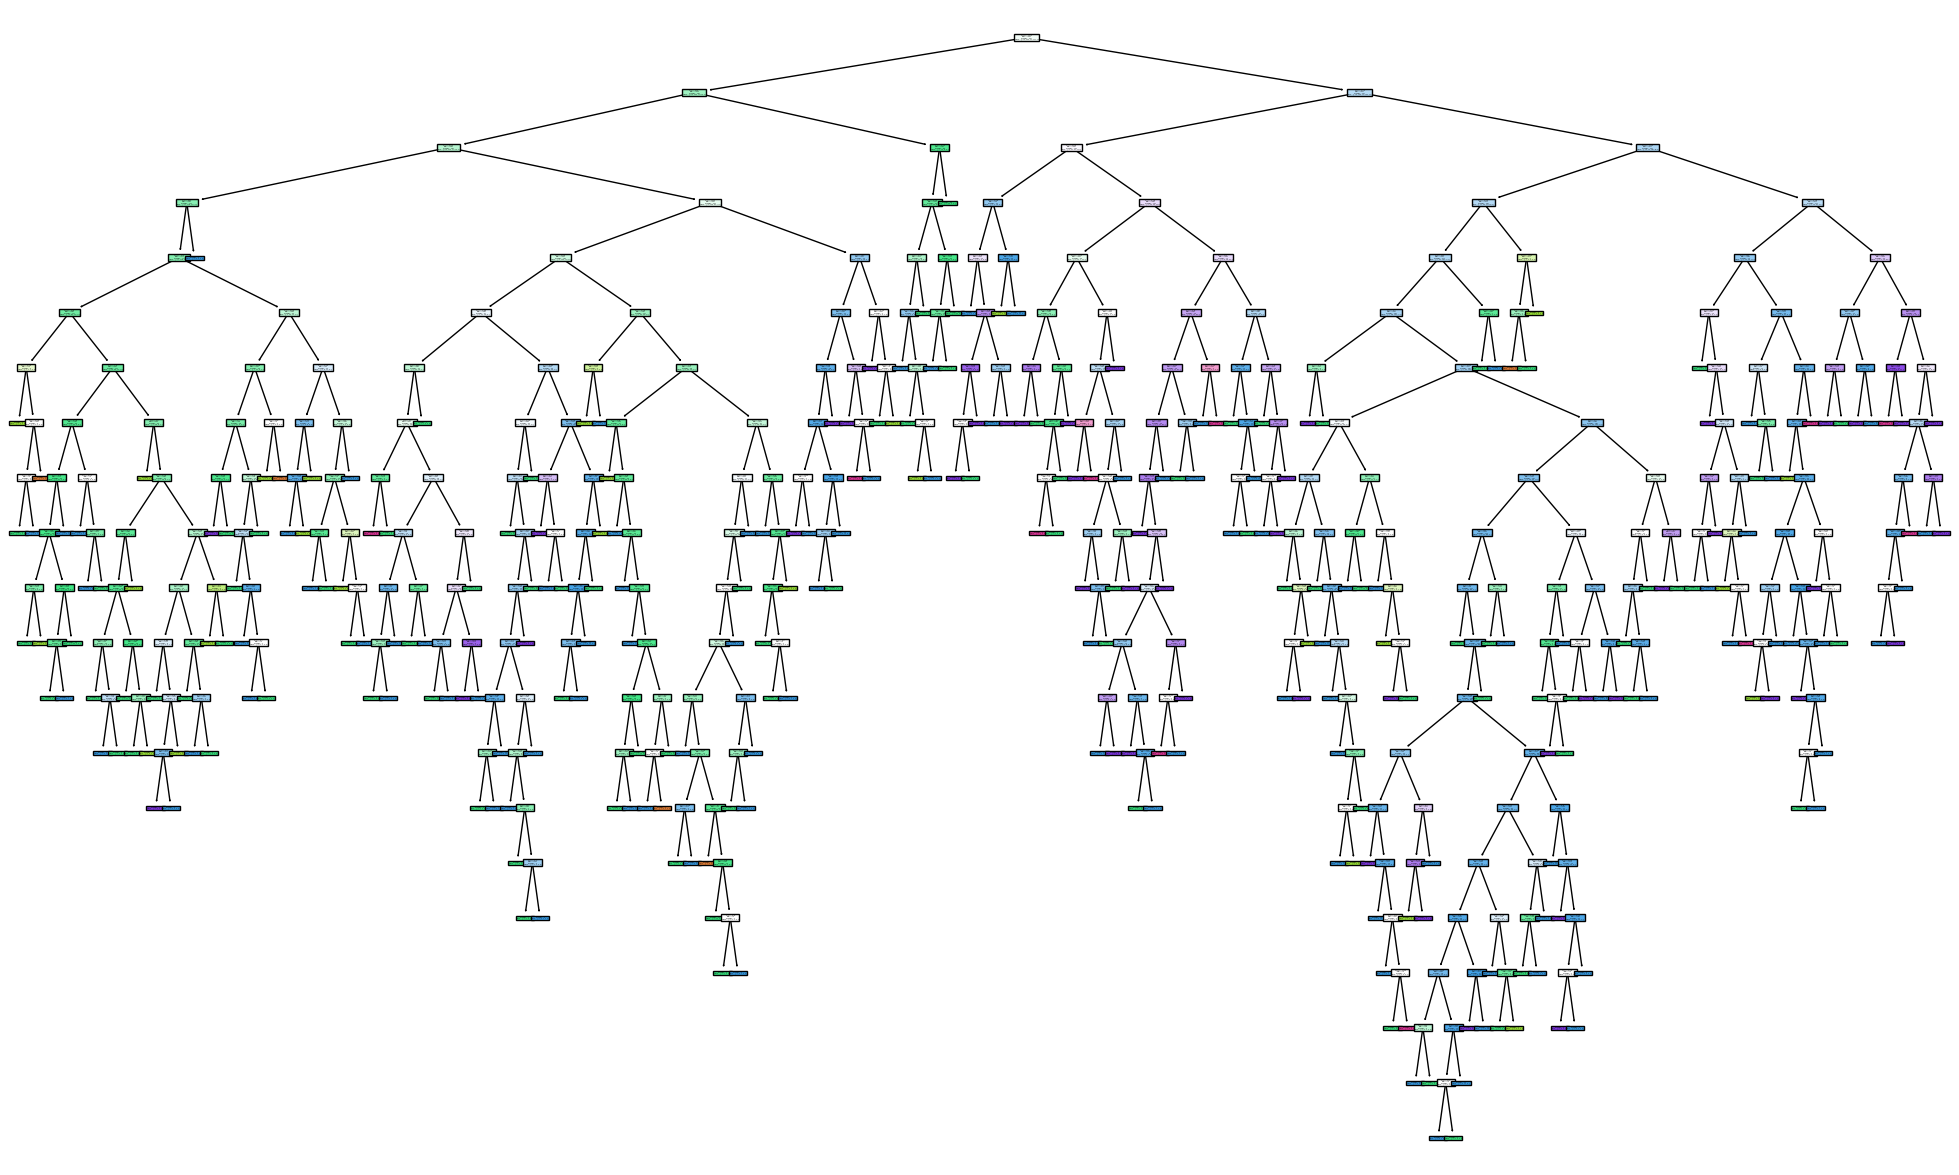

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, filled=True);